In [5]:
import qubic.toolchain as tc
import qubic.rpc_client as rc
import qubitconfig.qchip as qc
from distproc.hwconfig import FPGAConfig, load_channel_configs
import numpy as np
import matplotlib.pyplot as plt
import chipcalibration.ramsey as gordon
from importlib import reload
import qubic.state_disc as sd
import chipcalibration.config as cfg

In [6]:
# instantiate runner and load xsa file (i.e. PL bitfile)
# use load_xsa=False if you don't want to reload bitfile
runner = rc.CircuitRunnerClient(ip='192.168.1.247')

In [7]:
qchipname = 'X4Y2'
fpga_config, qchip, channel_config = cfg.load_configs(qchipname)
chanmap = {'Q0':7,'Q2':1,'Q1':4,'Q3':3,'Q4':5,'Q5':6,'Q6':2}

In [37]:
target_qubits = ['Q2']#, 'Q2']#, 'Q3']

In [38]:
# typical starting timestep 4 ns per step (or 2)
# timestep in log space
# HF optimization
reload(gordon)
delayTime = np.linspace(0, 5.e-7, 100)
opt = gordon.RamseyOptimize(target_qubits,delayTime,qchip, fpga_config, channel_config)


done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling


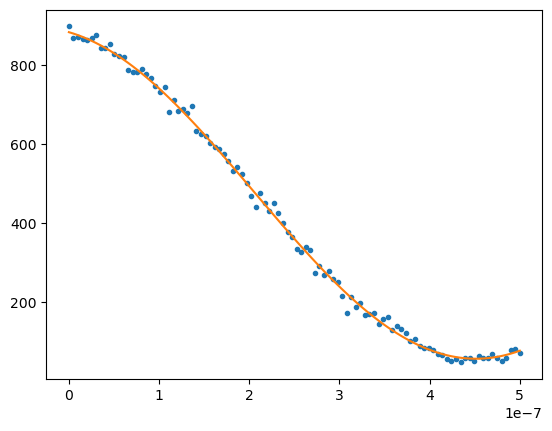

done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling


/home/neelay/anaconda3/envs/qubic2/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


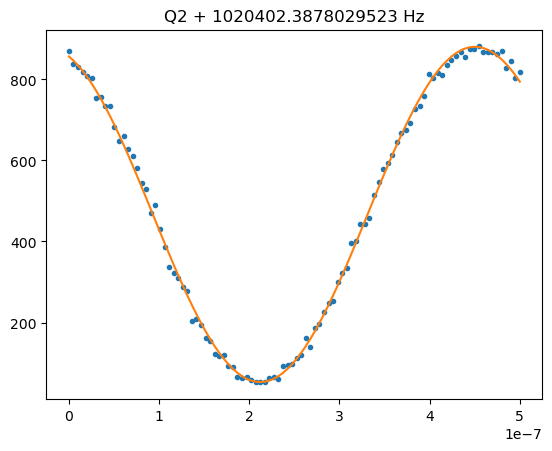

done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling


/home/neelay/anaconda3/envs/qubic2/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


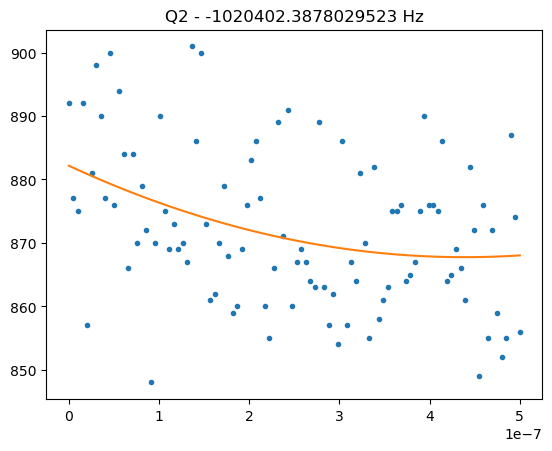

({'Q2': (array([ 4.13133558e+02,  4.66741719e+02,  2.10015502e+06, -3.42113612e-01,
          -6.79862073e+04]),
   array([[inf, inf, inf, inf, inf],
          [inf, inf, inf, inf, inf],
          [inf, inf, inf, inf, inf],
          [inf, inf, inf, inf, inf],
          [inf, inf, inf, inf, inf]]))},
 {'Q2': (array([ 1.29171901e+04,  1.37849305e+04,  1.71409368e+04, -3.09433852e+00,
          -1.43396405e+04]),
   array([[inf, inf, inf, inf, inf],
          [inf, inf, inf, inf, inf],
          [inf, inf, inf, inf, inf],
          [inf, inf, inf, inf, inf],
          [inf, inf, inf, inf, inf]]))})

In [39]:
opt.run_optimize_step(runner, 1000, {q: [720, 500, 1/.6e-6, 0, 1.5e-5] for q in target_qubits})

In [40]:
# qubitsign = [1]
# for i, qubit in enumerate(target_qubits):
#     print(opt.initial_ramsey.fit_params[qubit][0])
#     opt.update_qubit_freq(qubit, qubitsign[i], qchip)
print(opt.initial_ramsey.fit_params[target_qubits[0]][0])
opt.update_qubit_freq(target_qubits[0], -1, qchip)

[ 4.20952537e+02  4.76041009e+02  1.02040239e+06 -2.48181738e-01
 -5.04531402e-01]


done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling


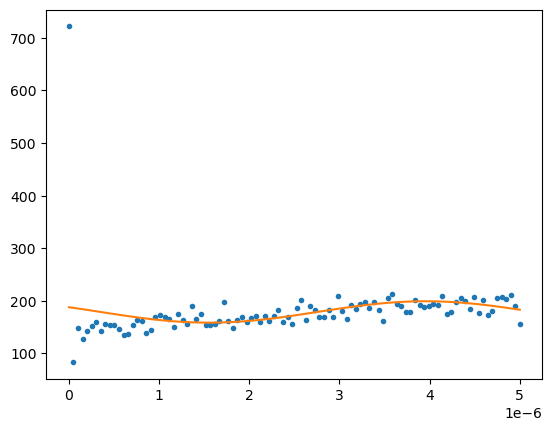

done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling


/home/neelay/anaconda3/envs/qubic2/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


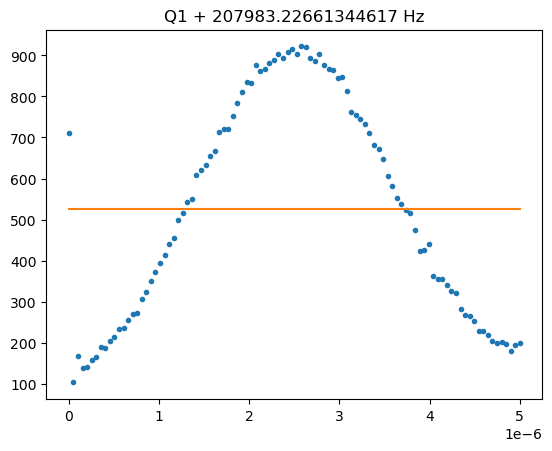

done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling


/home/neelay/anaconda3/envs/qubic2/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


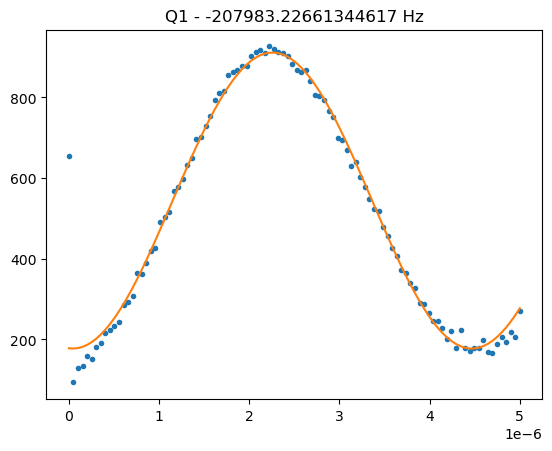

({'Q1': (array([-3.75750695e+01,  5.64505477e+02,  2.10980521e+01, -1.88724170e+01,
          -9.46643568e+06]),
   array([[inf, inf, inf, inf, inf],
          [inf, inf, inf, inf, inf],
          [inf, inf, inf, inf, inf],
          [inf, inf, inf, inf, inf],
          [inf, inf, inf, inf, inf]]))},
 {'Q1': (array([-3.67365118e+02,  5.44161146e+02, -2.26091910e+05, -1.89134046e+01,
          -1.05925262e+07]),
   array([[inf, inf, inf, inf, inf],
          [inf, inf, inf, inf, inf],
          [inf, inf, inf, inf, inf],
          [inf, inf, inf, inf, inf],
          [inf, inf, inf, inf, inf]]))})

In [33]:
# LF (fine) optimization
delayTime = np.linspace(0, 5.e-6, 100)
opt = gordon.RamseyOptimize(target_qubits,delayTime,qchip, fpga_config, channel_config)
opt.run_optimize_step(runner, 1000, {q: [720, 500, 1/.6e-6, 0, 1.5e-5] for q in target_qubits})

done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling


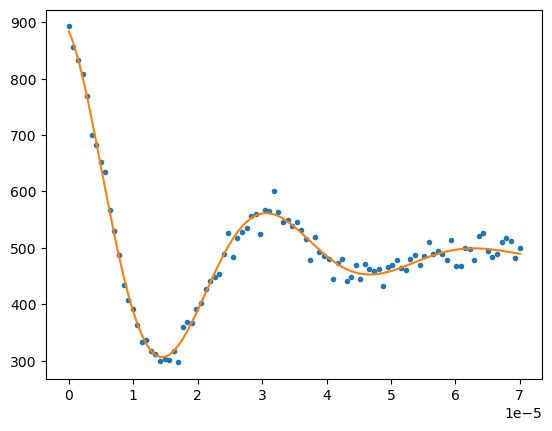

done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling


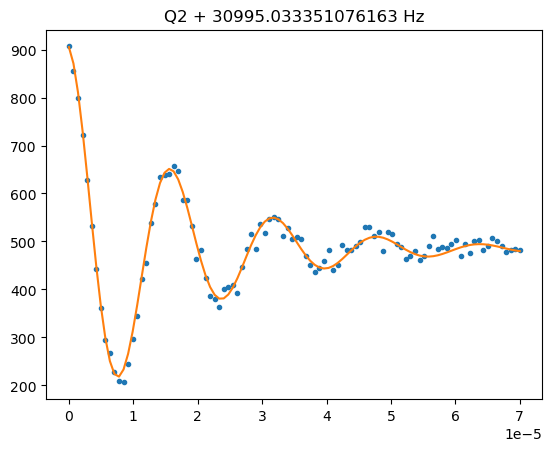

done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling


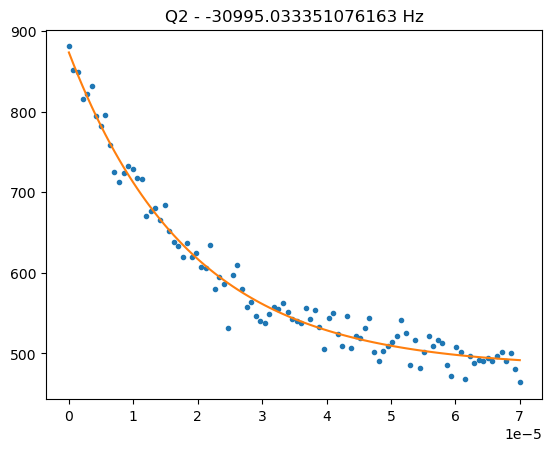

({'Q2': (array([ 4.21201186e+02,  4.84279799e+02,  6.23319521e+04, -1.57647767e-02,
           1.70973739e-05]),
   array([[ 1.00259197e+02,  6.31013948e-01, -6.62939231e+02,
           -7.14521135e-02, -4.01149614e-06],
          [ 6.31013948e-01,  2.63647924e+00, -6.78192808e+01,
           -7.73135497e-03, -1.22054942e-08],
          [-6.62939231e+02, -6.78192808e+01,  9.34056975e+04,
            5.52244419e+00,  2.52375594e-05],
          [-7.14521135e-02, -7.73135497e-03,  5.52244419e+00,
            5.80385382e-04,  2.74522675e-09],
          [-4.01149614e-06, -1.22054942e-08,  2.52375594e-05,
            2.74522675e-09,  2.99122491e-13]]))},
 {'Q2': (array([5.03095730e+02, 4.82091060e+02, 2.97433297e-01, 6.79679389e-01,
          1.87792031e-05]),
   array([[ 2.27483006e+16, -3.35828257e+07, -1.29943790e+13,
            5.59521408e+13, -2.40946606e+04],
          [-3.35828257e+07,  2.02836486e+01,  9.07869306e+04,
           -8.26009226e+04, -9.59269680e-05],
          [-1.29943

In [41]:
# LF (finer) optimization
delayTime = np.linspace(0, 70.e-6, 100)
reload(gordon)
opt = gordon.RamseyOptimize(target_qubits,delayTime,qchip, fpga_config, channel_config)
opt.run_optimize_step(runner, 1000, {q: [720, 500, 1/.6e-6, 0, 1.5e-5] for q in target_qubits})

In [42]:
print(opt.initial_ramsey.fit_params[target_qubits[0]][0])
opt.update_qubit_freq(target_qubits[0], -1, qchip)

[ 3.99350246e+02  4.85255311e+02  3.09950334e+04 -5.78003919e-02
  1.89064172e-05]


In [43]:
qchip.save('../submodules/qchip/X4Y2/qubitcfg.json')
qchip_old = qc.QChip('../submodules/qchip/X4Y2/X4Y2_rabi_amp_cal.json')

qchip.qubits['Q2'].freq - qchip_old.qubits['Q2'].freq

-1051397.4211540222

In [180]:
#now measure T2 with updated qchip
delayTime = np.linspace(0, 30.e-6, 100)
sram = gordon.Ramsey(target_qubits, delayTime, qchip, fpga_config, channel_config)

done resolving block
done z-resolving block
done resolving block
done z-resolving block
done scheduling


In [181]:
sram.run(runner, 1000)

In [184]:
sram.fit_ramsey_freq({q: [720, 500, 0, 0, 1.5e-5] for q in target_qubits}, use_fft=False)

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


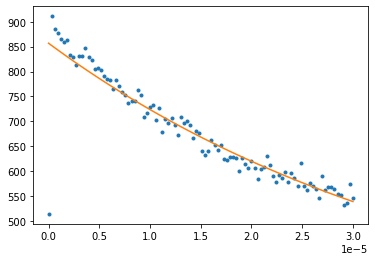

In [185]:
sram.plot_fits('Q2')

In [186]:
sram.fit_params

{'Q2': (array([8.67652651e+02, 2.52762932e+02, 0.00000000e+00, 1.81364945e+05,
         4.01400876e-05]),
  array([[inf, inf, inf, inf, inf],
         [inf, inf, inf, inf, inf],
         [inf, inf, inf, inf, inf],
         [inf, inf, inf, inf, inf],
         [inf, inf, inf, inf, inf]]))}

In [ ]:
# how to pick freq
# exp decay fit, then exp decay modulated fit: compare goodness of fit
#  if exp decay + sin fit is much worse than pure exp decay, this is likely to be the right freq
#  if exp decay only is much worse, there are oscillations and this is likely to be the wrong freq